# EG/2020/4225
# Suraweera S.A.Y.A.
# Task 1

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

#### Load Image

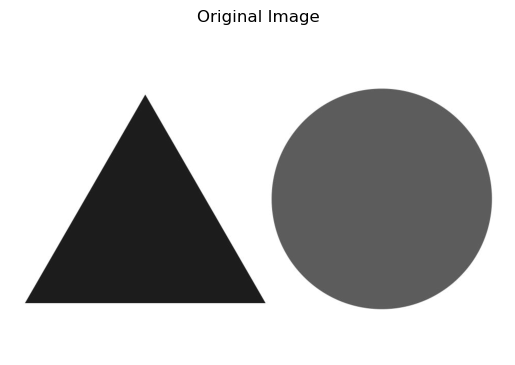

In [7]:
img_path = os.path.join("..", "images", "task1", "sample.jpg")
image  = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image , cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

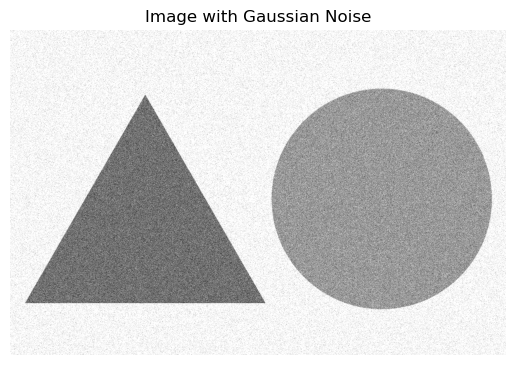

In [8]:
mean = 0
std_dev = 20
gaussian_noise = np.random.normal(mean, std_dev, img.shape).astype(np.int16)
noisy_image = np.clip(image.astype(np.int16) + gaussian_noise, 0, 255).astype(np.uint8)

plt.imshow(noisy_image, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')
plt.show()

#### Implementation of Ostu's algorithm

In [9]:
# Implementation of Ostu's algorithm
def otsu_threshold(image):
    # Computing histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).ravel()
    total = image.size

    # Normalizing the histogram
    prob = hist / total

    # Computing cumulative sums and means
    cumulative_prob = np.cumsum(prob)
    cumulative_mean = np.cumsum(prob * np.arange(256))
    global_mean = cumulative_mean[-1]

    # Computing between-class variance for all thresholds
    between_class_variance = ((global_mean * cumulative_prob - cumulative_mean) ** 2) / (cumulative_prob * (1 - cumulative_prob) + 1e-6)

    # Finding the threshold with max between-class variance
    optimal_threshold = np.argmax(between_class_variance)

    return optimal_threshold

#### Testing the implemented Otsu's algorithm

In [10]:
# Testing the implemented Otsu's algorithm
threshold = otsu_threshold(noisy_image)
otsu_result = (noisy_image >= threshold).astype(np.uint8) * 255

# Using built-in Otsu's algorithm in OpenCV
_, otsu_thresh = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#### plot

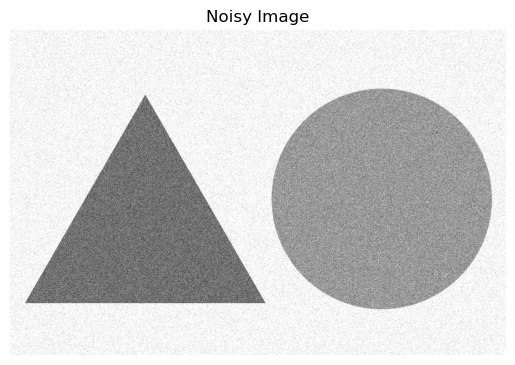

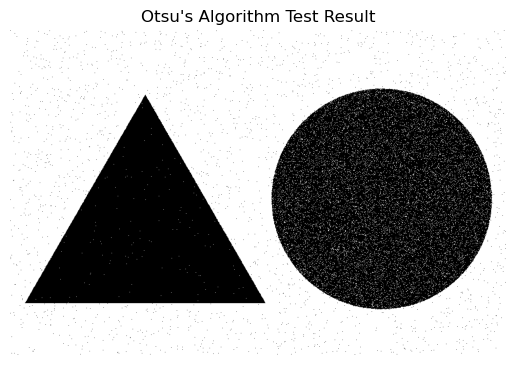

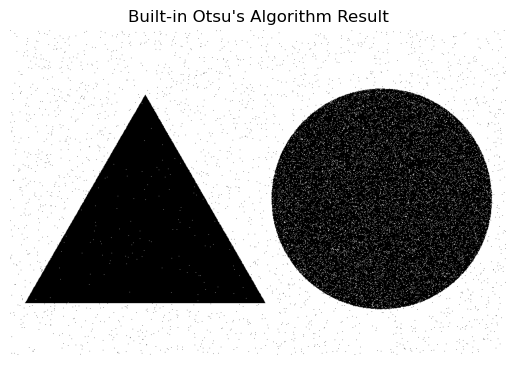

In [11]:
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.show()

# Plotting the output obtained from implemented Otsu's algorithm in OpenCV
plt.imshow(otsu_result, cmap='gray')
plt.title("Otsu's Algorithm Test Result")
plt.axis('off')
plt.show()

# Plotting the output obtained from the built-in Otsu's algorithm in OpenCV
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Built-in Otsu's Algorithm Result")
plt.axis('off')
plt.show()